Full 31-day data saved → synthetic_solar.csv, synthetic_load.csv

Last 25h solar: 25 rows
   From: 2021-01-30 00:00:00
   To:   2021-01-31 00:00:00
Last 25 hours saved → last_25h_solar.csv, last_25h_load.csv


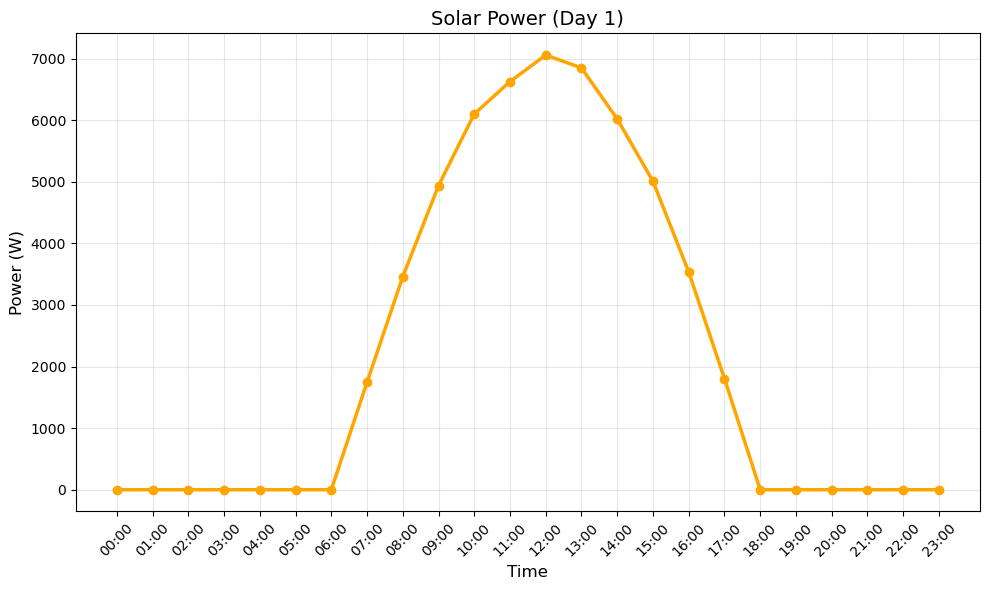

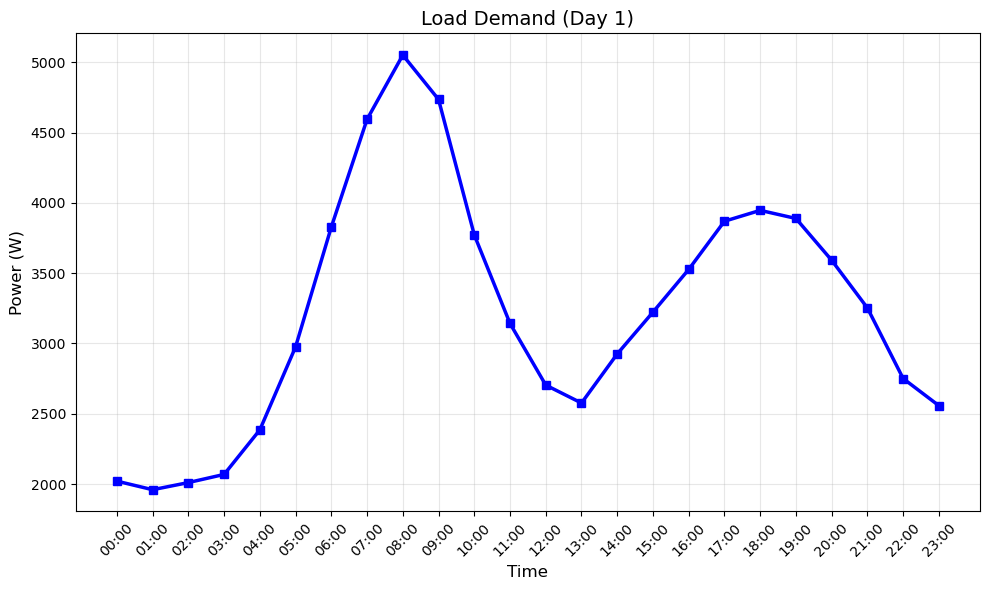

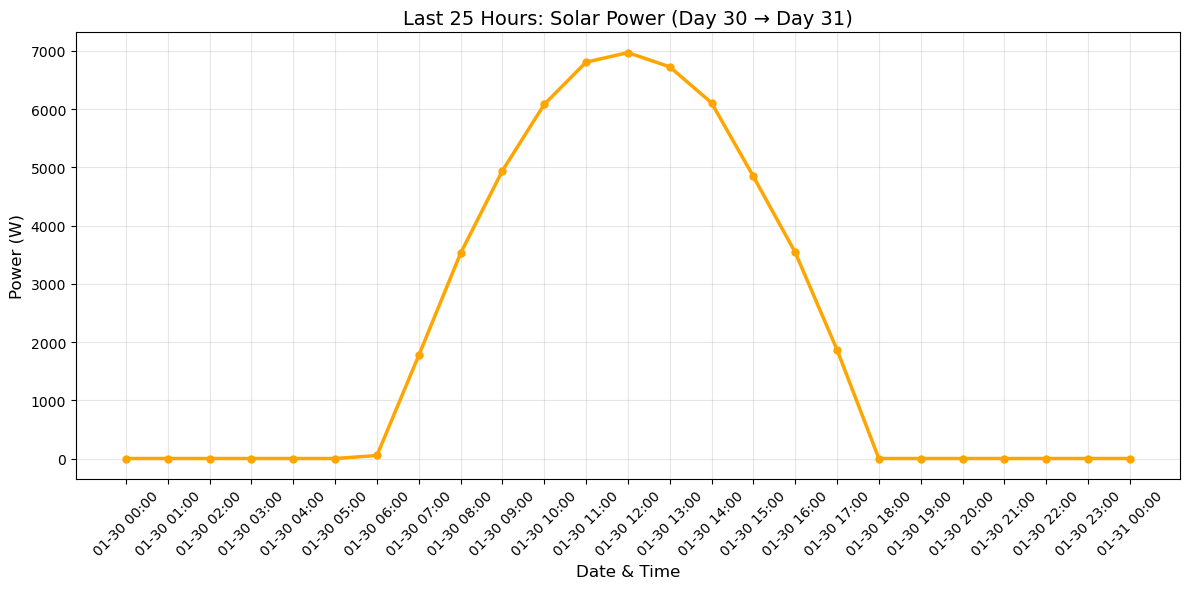

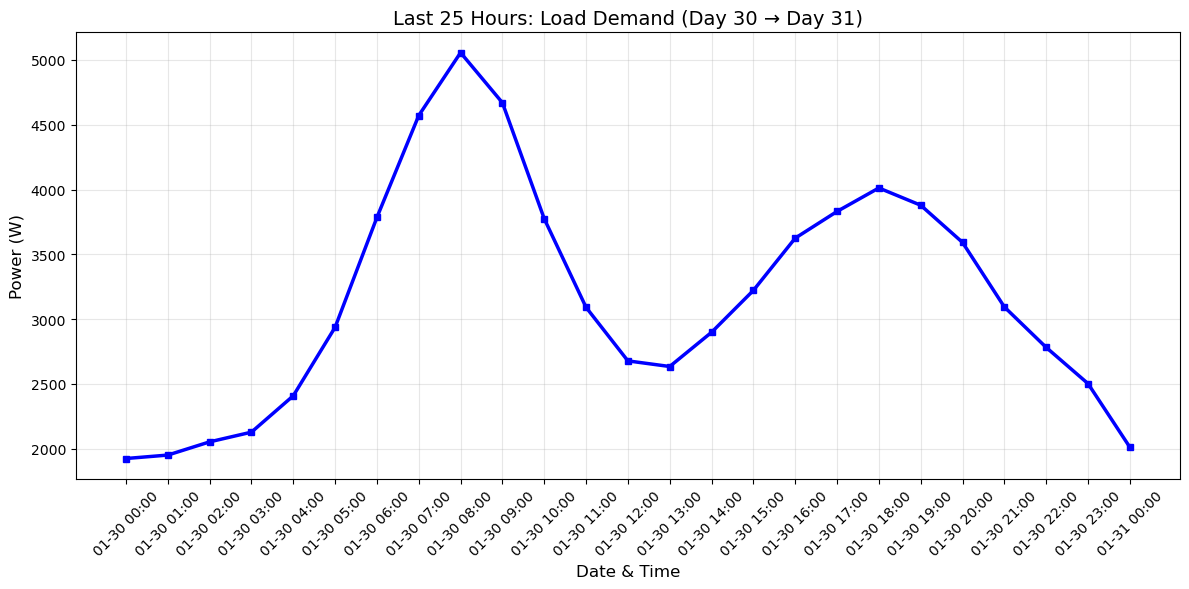


All done!
   • last_25h_solar.csv → 25 rows (00:00 day 30 to 00:00 day 31)
   • last_25h_load.csv  → 25 rows


In [5]:
# ----------------------------------------------------------------------
#  generate_synthetic_data_with_last_25h.py
#  → Full 31-day data + LAST 25 HOURS (00:00 day 30 → 00:00 day 31)
# ----------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------------------------------------------------
# 1. Generate 31 days of hourly data (744 points) → ensures 25h at end
# ----------------------------------------------------------------------
total_days = 31
hours = np.arange(0, 24 * total_days)  # 744 points

# Solar: 6 AM – 6 PM
solar = np.zeros_like(hours, dtype=float)
for h in range(len(hours)):
    hour_of_day = h % 24
    if 6 <= hour_of_day < 18:
        solar[h] = np.sin(np.pi * (hour_of_day - 6) / 12) * 7000 + np.random.normal(0, 50)
        solar[h] = max(solar[h], 0)
    else:
        solar[h] = 0

# Load: baseline + peaks
base = 2000
morning_peak = 3000 * np.exp(-((hours % 24 - 8) ** 2 / (2 * 2 ** 2)))
evening_peak = 2000 * np.exp(-((hours % 24 - 18) ** 2 / (2 * 3 ** 2)))
load = base + morning_peak + evening_peak + np.random.normal(0, 50, len(hours))

# ----------------------------------------------------------------------
# 2. Create full DataFrames
# ----------------------------------------------------------------------
timestamps = pd.date_range(start='2021-01-01', periods=len(hours), freq='h')

df_solar = pd.DataFrame({
    'timestamp': timestamps,
    'solar': solar
})
df_load = pd.DataFrame({
    'timestamp': timestamps,
    'load': load
})

# ----------------------------------------------------------------------
# 3. Save full 31-day data
# ----------------------------------------------------------------------
df_solar.to_csv('synthetic_solar.csv', index=False)
df_load.to_csv('synthetic_load.csv', index=False)
print(f"Full {total_days}-day data saved → synthetic_solar.csv, synthetic_load.csv")

# ----------------------------------------------------------------------
# 4. Extract LAST 25 HOURS: 00:00 day 30 → 00:00 day 31
# ----------------------------------------------------------------------
# Day 30 starts at index: 29 * 24 = 696
# We want: 696 to 720 inclusive → 25 points
start_idx = 29 * 24  # 696
end_idx = start_idx + 25  # 721 → but max is 743

last_25h_solar = df_solar.iloc[start_idx:start_idx + 25].copy()
last_25h_load  = df_load.iloc[start_idx:start_idx + 25].copy()

# Verify
print(f"\nLast 25h solar: {len(last_25h_solar)} rows")
print(f"   From: {last_25h_solar['timestamp'].iloc[0]}")
print(f"   To:   {last_25h_solar['timestamp'].iloc[-1]}")

last_25h_solar.to_csv('last_25h_solar.csv', index=False)
last_25h_load.to_csv('last_25h_load.csv', index=False)
print("Last 25 hours saved → last_25h_solar.csv, last_25h_load.csv")

# ----------------------------------------------------------------------
# 5. Plot first 24h (Day 1)
# ----------------------------------------------------------------------
hours_only = df_solar['timestamp'][:24].dt.strftime('%H:%M')

plt.figure(figsize=(10, 6))
plt.plot(hours_only, df_solar['solar'][:24], color='orange', linewidth=2.5, marker='o', markersize=6)
plt.title('Solar Power (Day 1)', fontsize=14)
plt.ylabel('Power (W)', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('solar_profile_24h.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(hours_only, df_load['load'][:24], color='blue', linewidth=2.5, marker='s', markersize=6)
plt.title('Load Demand (Day 1)', fontsize=14)
plt.ylabel('Power (W)', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('load_profile_24h.png', dpi=300, bbox_inches='tight')
plt.show()

# ----------------------------------------------------------------------
# 6. Plot LAST 25 HOURS
# ----------------------------------------------------------------------
last_hours = last_25h_solar['timestamp'].dt.strftime('%m-%d %H:%M')

plt.figure(figsize=(12, 6))
plt.plot(last_hours, last_25h_solar['solar'], color='orange', linewidth=2.5, marker='o', markersize=5)
plt.title('Last 25 Hours: Solar Power (Day 30 → Day 31)', fontsize=14)
plt.ylabel('Power (W)', fontsize=12)
plt.xlabel('Date & Time', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('last_25h_solar_plot.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(last_hours, last_25h_load['load'], color='blue', linewidth=2.5, marker='s', markersize=5)
plt.title('Last 25 Hours: Load Demand (Day 30 → Day 31)', fontsize=14)
plt.ylabel('Power (W)', fontsize=12)
plt.xlabel('Date & Time', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('last_25h_load_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nAll done!")
print("   • last_25h_solar.csv → 25 rows (00:00 day 30 to 00:00 day 31)")
print("   • last_25h_load.csv  → 25 rows")